# Municipal Waste Cost Predictions using Principle Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
from datascience import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("public_data_waste_fee.csv")

In [3]:
df.shape

(4341, 39)

In [4]:
df

,region,province,name,tc,cres,csor,istat,area,pop,alt,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,...,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,...,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,...,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,...,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,...,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,Veneto,Vicenza,NaN,122.500000,44.320000,43.590000,24125,NaN,5031,NaN,...,2113374,71.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4337,Lombardia,Varese,NaN,126.220001,51.250000,22.620001,12143,NaN,2623,NaN,...,1240725,79.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4338,Veneto,Belluno,NaN,94.190002,17.080000,47.700001,25074,NaN,13515,NaN,...,5554469,88.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4339,Veneto,Vicenza,NaN,169.559998,70.230003,75.250000,24127,NaN,4683,NaN,...,2172620,67.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What values are we predicting?

Cost per capita in Euros - Given as 'tc'

## But, where and how should we begin to clean the data?

In [34]:
df['tc'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
4336    False
4337    False
4338    False
4339    False
4340    False
Name: tc, Length: 4341, dtype: bool

Additional information: https://www.google.com/url?q=https://www.kaggle.com/datasets/shashwatwork/municipal-waste-management-cost-prediction&sa=D&source=docs&ust=1669815027431891&usg=AOvVaw0hd6Hwu4zJU8uPBhFqv1FZ

In [6]:
dropped_col_df = df.drop(columns = ['proads', 'roads', 'texile', 'wood', 'organic'])
dropped_col_df

,region,province,name,tc,cres,csor,istat,area,pop,alt,...,msw_so,msw_un,msw,sor,geo,s_wteregio,s_landfill,gdp,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,...,20396261.0,13560520,33956781,60.07,3.0,33.105049,15.233530,7.269942,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,...,1831407.0,580460,2411867,75.93,3.0,33.105049,15.233530,7.109984,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,...,1694922.0,464400,2159322,78.49,3.0,33.105049,15.233530,7.267856,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,...,2881055.0,770860,3651915,78.89,3.0,33.105049,15.233530,7.085936,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,...,3026700.0,4169180,7195880,42.06,1.0,4.046452,45.411903,7.247444,9.125561,7.464867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,Veneto,Vicenza,NaN,122.500000,44.320000,43.590000,24125,NaN,5031,NaN,...,1515377.0,597997,2113374,71.70,NaN,NaN,NaN,NaN,NaN,NaN
4337,Lombardia,Varese,NaN,126.220001,51.250000,22.620001,12143,NaN,2623,NaN,...,987025.0,253700,1240725,79.55,NaN,NaN,NaN,NaN,NaN,NaN
4338,Veneto,Belluno,NaN,94.190002,17.080000,47.700001,25074,NaN,13515,NaN,...,4904299.0,650170,5554469,88.30,NaN,NaN,NaN,NaN,NaN,NaN
4339,Veneto,Vicenza,NaN,169.559998,70.230003,75.250000,24127,NaN,4683,NaN,...,1471450.0,701170,2172620,67.73,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dropped_col_df = dropped_col_df.rename(columns = {'tc': 'Cost Per Capita eur', 'cres': 'Residual Cost Per Capita', 
'csor': 'Sorted Cost Per Capita', 'istat': 'National Code', 'area': 'Area in km^2', 
'pop': 'Population', 'alt': 'Altitude m.s.l.', 'isle': 'Dummy Municipality on Isle', 
'sea': 'Dummy Coastal Municipality', 'pden': 'Population Density (People per km^2)', 
'wden': 'Waste per km^2', 'fee': 'Fee Scheme', 'd_fee': 'dummy PAYT', 'sample': 'Reg with PAYT',
'paper': 'Paper %', 'glass': 'Glass %', 'plastic': 'Plastic %', 'raee': 'Raee %', 'other': 'Other %', 
'msw_so': 'MSW Sorted kg', 'msw_un': 'MSW Unsorted kg', 'msw': 'Municipal Solid Waste kg',
'sor': 'Share of Sorther Waste', 'geo': '1 South, 2 Center, 3 North', 
's_wteregio': 'Share of SW Sent to W2E plants-regional figure',
's_landfill': 'Share of Waste to Landfill', 'gdp': 'GDP-Municipal Revenues EUR', 'wage': 'Taxable income EUR',
'finance': 'Finance-Municipal Revenues EUR'
})

In [8]:
dropped_col_df.isna().sum() / len(dropped_col_df)

region                                            0.000000
province                                          0.000000
name                                              0.001382
Cost Per Capita eur                               0.000000
Residual Cost Per Capita                          0.011979
Sorted Cost Per Capita                            0.015434
National Code                                     0.000000
Area in km^2                                      0.001382
Population                                        0.000000
Altitude m.s.l.                                   0.001382
Dummy Municipality on Isle                        0.001382
Dummy Coastal Municipality                        0.001382
Population Density (People per km^2)              0.001382
Waste per km^2                                    0.001382
urb                                               0.001382
Fee Scheme                                        0.000000
dummy PAYT                                        0.0000

In [9]:
column_to_fill_na = ['Residual Cost Per Capita', "Sorted Cost Per Capita",
 "Area in km^2", "Altitude m.s.l.", "Population Density (People per km^2)",
 "Waste per km^2", "urb", "Paper %", "Glass %", "metal", "Plastic %", "Raee %",
 "Other %", "Share of SW Sent to W2E plants-regional figure", "Share of Waste to Landfill",
 "GDP-Municipal Revenues EUR", "Taxable income EUR", "Finance-Municipal Revenues EUR"]

In [10]:
for i in column_to_fill_na:
    column_mean = np.mean(dropped_col_df[i])
    dropped_col_df[i] = dropped_col_df[i].fillna(column_mean)

In [11]:
dropped_col_df

,region,province,name,Cost Per Capita eur,Residual Cost Per Capita,Sorted Cost Per Capita,National Code,Area in km^2,Population,Altitude m.s.l.,...,MSW Sorted kg,MSW Unsorted kg,Municipal Solid Waste kg,Share of Sorther Waste,"1 South, 2 Center, 3 North",Share of SW Sent to W2E plants-regional figure,Share of Waste to Landfill,GDP-Municipal Revenues EUR,Taxable income EUR,Finance-Municipal Revenues EUR
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.000000,...,20396261.0,13560520,33956781,60.07,3.0,33.105049,15.233530,7.269942,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.000000,...,1831407.0,580460,2411867,75.93,3.0,33.105049,15.233530,7.109984,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.000000,...,1694922.0,464400,2159322,78.49,3.0,33.105049,15.233530,7.267856,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.000000,...,2881055.0,770860,3651915,78.89,3.0,33.105049,15.233530,7.085936,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.000000,...,3026700.0,4169180,7195880,42.06,1.0,4.046452,45.411903,7.247444,9.125561,7.464867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,Veneto,Vicenza,NaN,122.500000,44.320000,43.590000,24125,40.995045,5031,310.052134,...,1515377.0,597997,2113374,71.70,NaN,21.867460,20.000860,7.231159,9.446968,7.448094
4337,Lombardia,Varese,NaN,126.220001,51.250000,22.620001,12143,40.995045,2623,310.052134,...,987025.0,253700,1240725,79.55,NaN,21.867460,20.000860,7.231159,9.446968,7.448094
4338,Veneto,Belluno,NaN,94.190002,17.080000,47.700001,25074,40.995045,13515,310.052134,...,4904299.0,650170,5554469,88.30,NaN,21.867460,20.000860,7.231159,9.446968,7.448094
4339,Veneto,Vicenza,NaN,169.559998,70.230003,75.250000,24127,40.995045,4683,310.052134,...,1471450.0,701170,2172620,67.73,NaN,21.867460,20.000860,7.231159,9.446968,7.448094


In [12]:
redropped_col_df = dropped_col_df.dropna()

In [13]:
redropped_col_df.shape

(4056, 34)

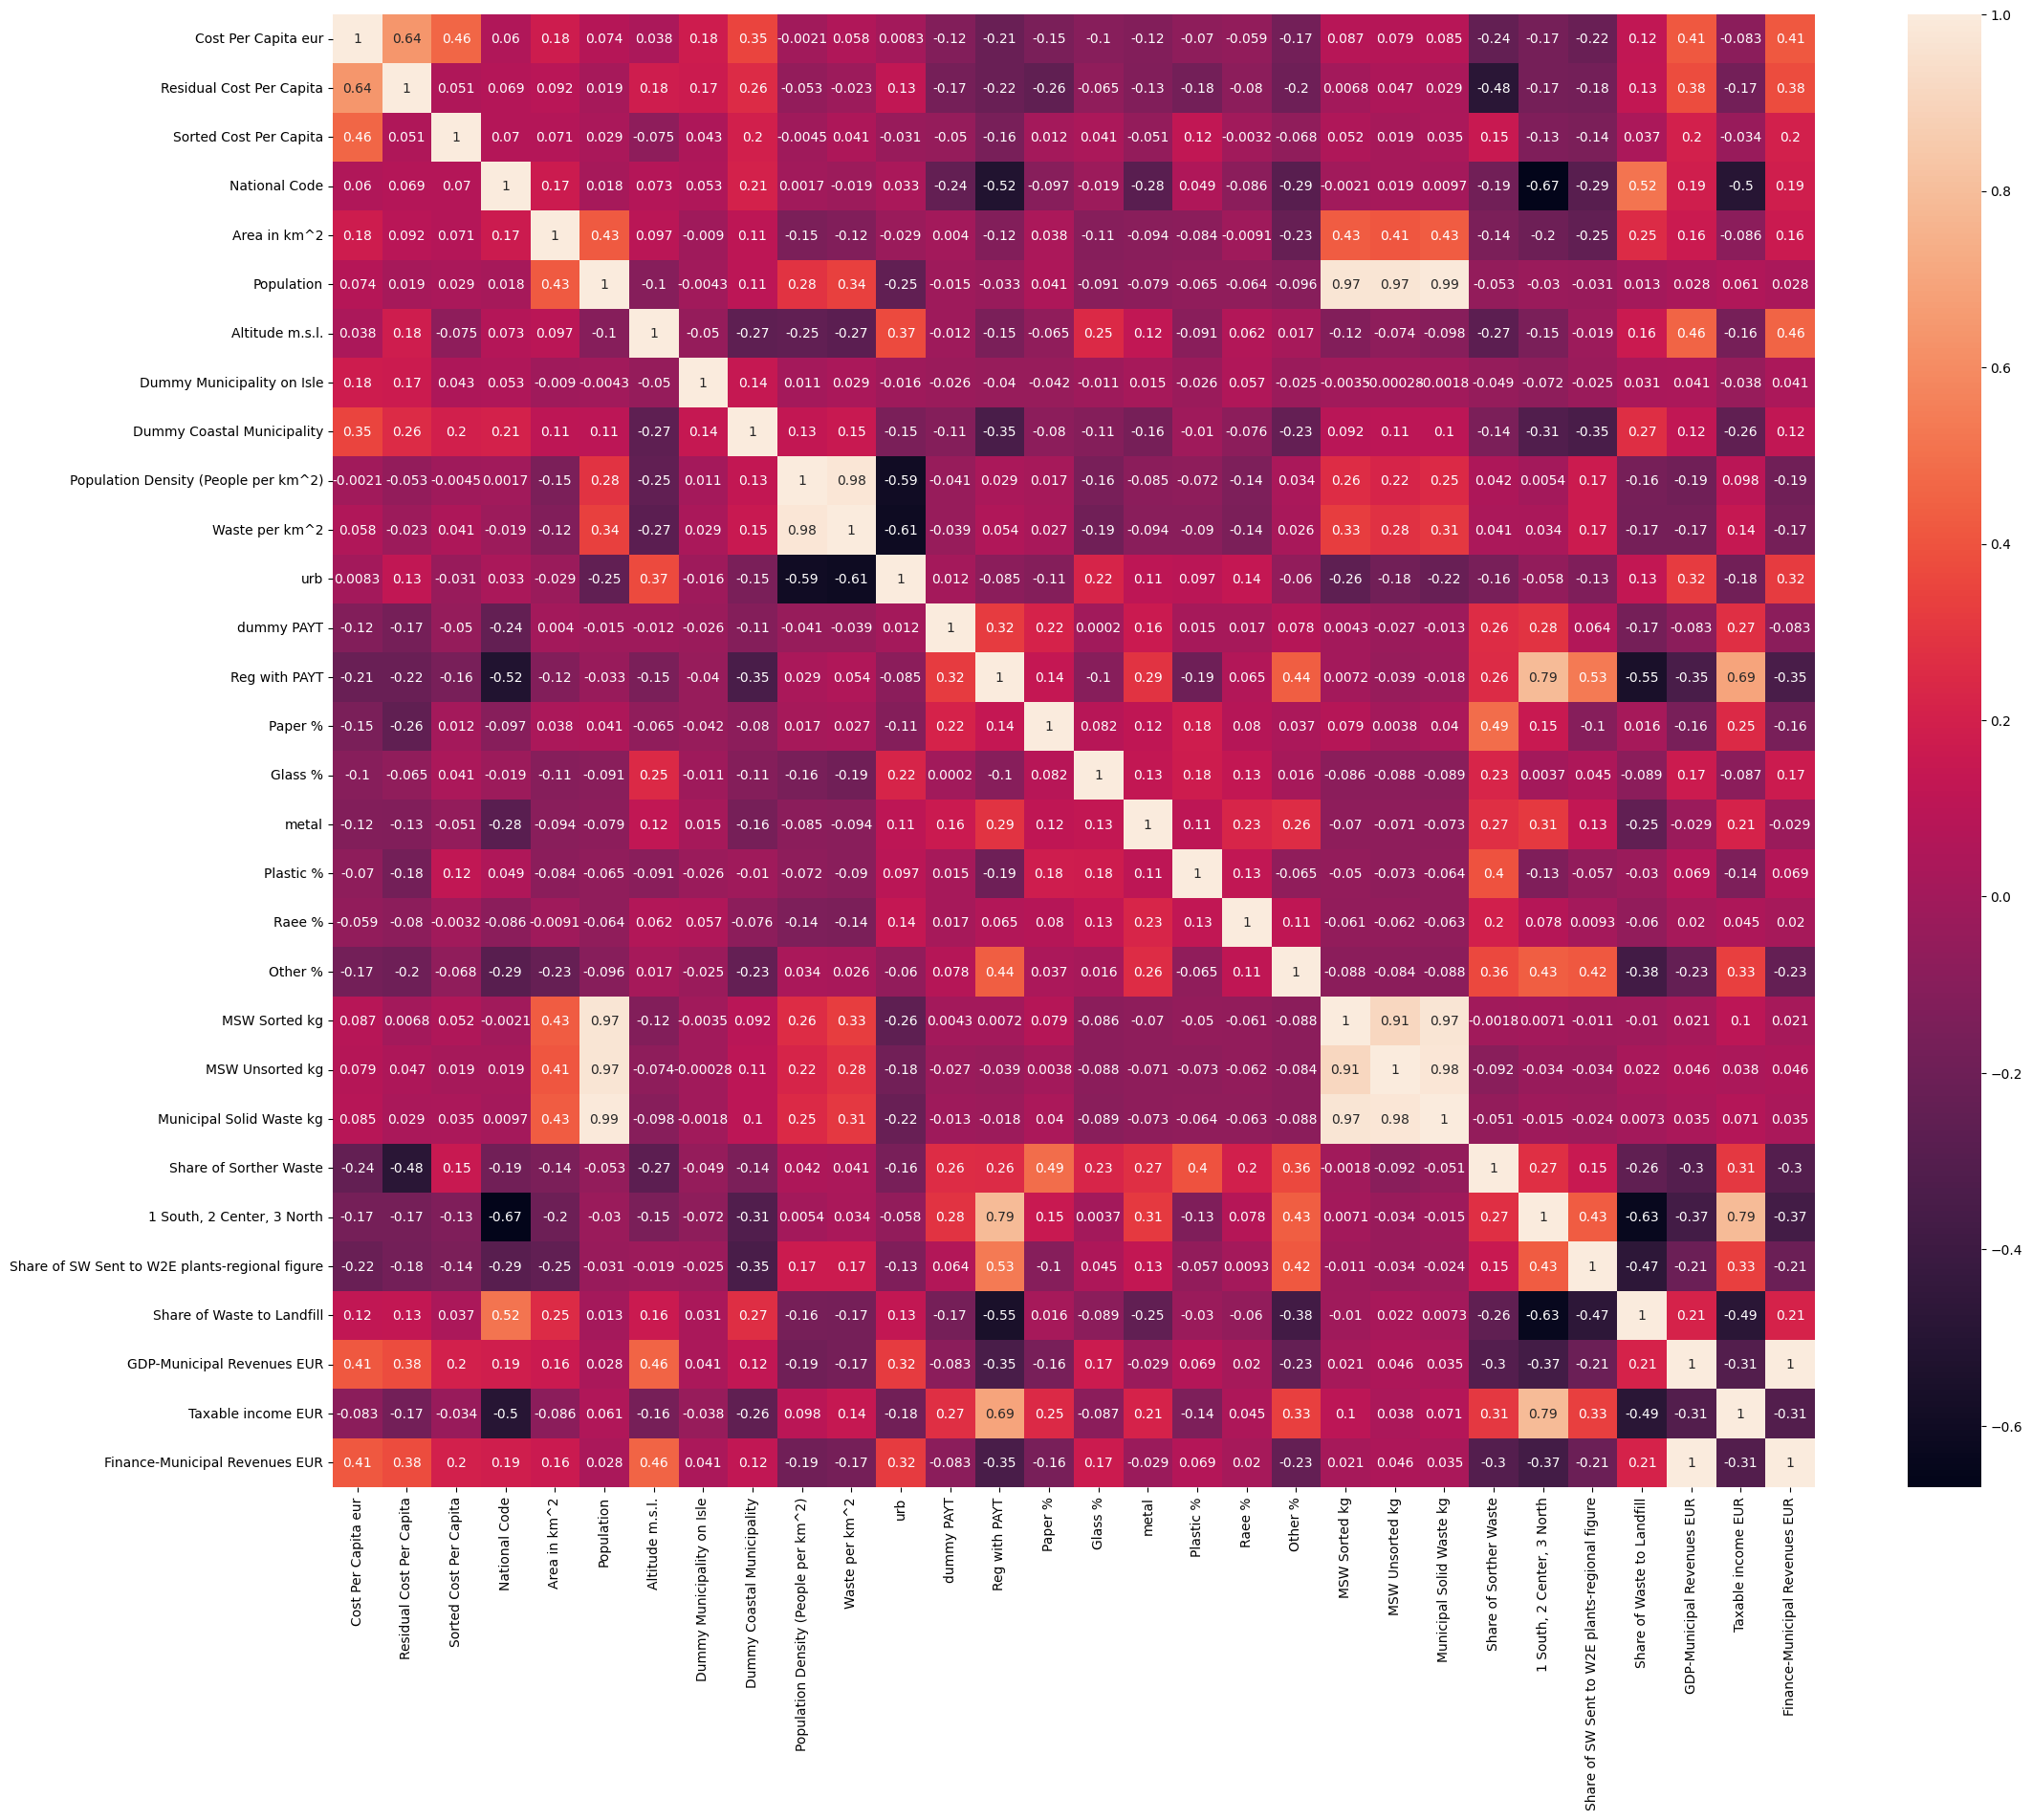

In [33]:
# Plot correlation
fig = plt.figure(figsize=(25, 20))
sns.heatmap(redropped_col_df.corr(), annot=True)
plt.savefig("result.png", dpi = 100)

In [15]:
redropped_col_df2 = redropped_col_df.drop(columns = ["name", "province", "National Code"])

In [16]:
new_columns = pd.get_dummies(data = redropped_col_df2["Fee Scheme"])
new_columns

,PAYT,STANDARD
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
4330,0,1
4331,1,0
4332,1,0
4333,1,0


In [17]:
new_df = redropped_col_df2.drop(columns = ["Fee Scheme"])
new_df = redropped_col_df2.join(new_columns)
new_df

,region,Cost Per Capita eur,Residual Cost Per Capita,Sorted Cost Per Capita,Area in km^2,Population,Altitude m.s.l.,Dummy Municipality on Isle,Dummy Coastal Municipality,Population Density (People per km^2),...,Municipal Solid Waste kg,Share of Sorther Waste,"1 South, 2 Center, 3 North",Share of SW Sent to W2E plants-regional figure,Share of Waste to Landfill,GDP-Municipal Revenues EUR,Taxable income EUR,Finance-Municipal Revenues EUR,PAYT,STANDARD
0,Emilia_Romagna,502.250000,129.270004,66.419998,283.750000,22648,1.0,0.0,1.0,79.816742,...,33956781,60.07,3.0,33.105049,15.233530,7.269942,9.438692,7.488041,1,0
1,Emilia_Romagna,228.050003,49.520000,44.139999,34.439999,4952,1.0,0.0,1.0,143.786301,...,2411867,75.93,3.0,33.105049,15.233530,7.109984,9.510139,7.323284,1,0
2,Emilia_Romagna,268.010010,50.610001,44.599998,26.620001,3895,1.0,0.0,1.0,146.318558,...,2159322,78.49,3.0,33.105049,15.233530,7.267856,8.891356,7.485891,1,0
3,Emilia_Romagna,199.089996,41.110001,40.439999,84.300003,7140,1.0,0.0,1.0,84.697502,...,3651915,78.89,3.0,33.105049,15.233530,7.085936,9.433685,7.298514,1,0
4,Puglia,233.639999,58.270000,25.950001,35.700001,12193,1.0,0.0,1.0,341.540619,...,7195880,42.06,1.0,4.046452,45.411903,7.247444,9.125561,7.464867,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,Lombardia,977.419983,469.290009,57.480000,16.139999,202,1508.0,0.0,0.0,12.515490,...,188003,38.76,3.0,38.501492,4.551430,10.538720,9.505127,10.854882,0,1
4331,Trentino_Alto_Adige,132.809998,32.380001,71.739998,209.649994,2423,1520.0,0.0,0.0,11.557358,...,1466016,70.63,3.0,18.539640,11.318043,8.413345,9.599592,8.665746,1,0
4332,Trentino_Alto_Adige,156.429993,62.910000,63.680000,56.240002,2660,1563.0,0.0,0.0,47.297295,...,3405016,64.84,3.0,18.539640,11.318043,8.609627,10.174608,8.867916,1,0
4333,Trentino_Alto_Adige,370.880005,89.139999,260.179993,38.840000,1320,1568.0,0.0,0.0,33.985580,...,2527097,75.21,3.0,18.539640,11.318043,8.750687,10.249179,9.013207,1,0


In [18]:
new_column2 = pd.get_dummies(data = redropped_col_df2["region"])

In [19]:
new_df = redropped_col_df2.drop(columns = ["region"])
new_df = redropped_col_df2.join(new_column2)
new_df = new_df.drop(columns = ["Fee Scheme", "region"])

In [20]:
new_df

,Cost Per Capita eur,Residual Cost Per Capita,Sorted Cost Per Capita,Area in km^2,Population,Altitude m.s.l.,Dummy Municipality on Isle,Dummy Coastal Municipality,Population Density (People per km^2),Waste per km^2,...,Molise,Puglia,Sardegna,Sicilia,Toscana,Trentino_Alto_Adige,Umbria,Valle_d'Aosta,Veneto,piemonte
0,502.250000,129.270004,66.419998,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,...,0,0,0,0,0,0,0,0,0,0
1,228.050003,49.520000,44.139999,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,...,0,0,0,0,0,0,0,0,0,0
2,268.010010,50.610001,44.599998,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,...,0,0,0,0,0,0,0,0,0,0
3,199.089996,41.110001,40.439999,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,...,0,0,0,0,0,0,0,0,0,0
4,233.639999,58.270000,25.950001,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,977.419983,469.290009,57.480000,16.139999,202,1508.0,0.0,0.0,12.515490,11648.265625,...,0,0,0,0,0,0,0,0,0,0
4331,132.809998,32.380001,71.739998,209.649994,2423,1520.0,0.0,0.0,11.557358,6992.683105,...,0,0,0,0,0,1,0,0,0,0
4332,156.429993,62.910000,63.680000,56.240002,2660,1563.0,0.0,0.0,47.297295,60544.378906,...,0,0,0,0,0,1,0,0,0,0
4333,370.880005,89.139999,260.179993,38.840000,1320,1568.0,0.0,0.0,33.985580,65064.289062,...,0,0,0,0,0,1,0,0,0,0


## Principle Component Analysis (PCA)

### Feature Scaling/ Normalizing the Data

In [21]:
# importing Scaler and PCA. 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
#fitting the dataframe columns into the scaler. 
df_columns = new_df.columns
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(new_df))
scaled_df.columns = df_columns
scaled_df

,Cost Per Capita eur,Residual Cost Per Capita,Sorted Cost Per Capita,Area in km^2,Population,Altitude m.s.l.,Dummy Municipality on Isle,Dummy Coastal Municipality,Population Density (People per km^2),Waste per km^2,...,Molise,Puglia,Sardegna,Sicilia,Toscana,Trentino_Alto_Adige,Umbria,Valle_d'Aosta,Veneto,piemonte
0,4.611835,1.786499,0.428803,4.278586,0.219456,-1.086320,-0.066766,2.258151,-0.430777,-0.217467,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
1,0.986351,-0.095638,-0.257015,-0.110098,-0.101183,-1.086320,-0.066766,2.258151,-0.349807,-0.352792,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
2,1.514704,-0.069913,-0.242855,-0.247756,-0.120336,-1.086320,-0.066766,2.258151,-0.346602,-0.322572,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
3,0.603440,-0.294118,-0.370907,0.767604,-0.061538,-1.086320,-0.066766,2.258151,-0.424599,-0.425608,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
4,1.060262,0.110866,-0.816935,-0.087918,0.030018,-1.086320,-0.066766,2.258151,-0.099497,0.005784,...,-0.126618,6.017558,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,10.894552,9.811129,0.153614,-0.432239,-0.187250,4.277835,-0.066766,-0.442840,-0.515964,-0.511950,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
4052,-0.272917,-0.500150,0.592561,2.974180,-0.147007,4.320549,-0.066766,-0.442840,-0.517177,-0.524641,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,5.0,-0.112845,-0.015704,-0.259554,-0.164607
4053,0.039388,0.220372,0.344461,0.273655,-0.142713,4.473607,-0.066766,-0.442840,-0.471939,-0.378654,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,5.0,-0.112845,-0.015704,-0.259554,-0.164607
4054,2.874855,0.839412,6.393075,-0.032643,-0.166993,4.491405,-0.066766,-0.442840,-0.488788,-0.366332,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,5.0,-0.112845,-0.015704,-0.259554,-0.164607


In [23]:
#determining our Y (prediction) and X (components)
y = scaled_df["Cost Per Capita eur"]
x = scaled_df.drop(columns = "Cost Per Capita eur")
x

,Residual Cost Per Capita,Sorted Cost Per Capita,Area in km^2,Population,Altitude m.s.l.,Dummy Municipality on Isle,Dummy Coastal Municipality,Population Density (People per km^2),Waste per km^2,urb,...,Molise,Puglia,Sardegna,Sicilia,Toscana,Trentino_Alto_Adige,Umbria,Valle_d'Aosta,Veneto,piemonte
0,1.786499,0.428803,4.278586,0.219456,-1.086320,-0.066766,2.258151,-0.430777,-0.217467,-0.797785,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
1,-0.095638,-0.257015,-0.110098,-0.101183,-1.086320,-0.066766,2.258151,-0.349807,-0.352792,0.873608,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
2,-0.069913,-0.242855,-0.247756,-0.120336,-1.086320,-0.066766,2.258151,-0.346602,-0.322572,0.873608,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
3,-0.294118,-0.370907,0.767604,-0.061538,-1.086320,-0.066766,2.258151,-0.424599,-0.425608,0.873608,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
4,0.110866,-0.816935,-0.087918,0.030018,-1.086320,-0.066766,2.258151,-0.099497,0.005784,-0.797785,...,-0.126618,6.017558,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,9.811129,0.153614,-0.432239,-0.187250,4.277835,-0.066766,-0.442840,-0.515964,-0.511950,0.873608,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,-0.2,-0.112845,-0.015704,-0.259554,-0.164607
4052,-0.500150,0.592561,2.974180,-0.147007,4.320549,-0.066766,-0.442840,-0.517177,-0.524641,0.873608,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,5.0,-0.112845,-0.015704,-0.259554,-0.164607
4053,0.220372,0.344461,0.273655,-0.142713,4.473607,-0.066766,-0.442840,-0.471939,-0.378654,0.873608,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,5.0,-0.112845,-0.015704,-0.259554,-0.164607
4054,0.839412,6.393075,-0.032643,-0.166993,4.491405,-0.066766,-0.442840,-0.488788,-0.366332,0.873608,...,-0.126618,-0.166180,-0.166962,-0.212981,-0.240056,5.0,-0.112845,-0.015704,-0.259554,-0.164607


In [24]:
#fitting the data
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[  1.28825605e-01   9.85376148e-02   6.09671452e-02   5.20620305e-02
   4.71637197e-02   3.91234503e-02   3.40480533e-02   3.09041926e-02
   2.89706648e-02   2.74059979e-02   2.61900815e-02   2.48189445e-02
   2.35483168e-02   2.34501061e-02   2.27535390e-02   2.25206476e-02
   2.21896514e-02   2.19140968e-02   2.15448126e-02   2.14858078e-02
   2.06912582e-02   1.99144740e-02   1.85860574e-02   1.74308943e-02
   1.73173466e-02   1.54408528e-02   1.38151845e-02   1.27215261e-02
   1.16323910e-02   1.12566356e-02   1.02931061e-02   9.99340981e-03
   9.35411359e-03   8.65996529e-03   7.46130624e-03   6.48272831e-03
   4.56011676e-03   3.64536040e-03   1.62383680e-03   3.93271003e-04
   1.64111415e-04   1.37242334e-04   3.32942424e-07   2.54063709e-32
   3.68960336e-33   2.84980461e-33   2.56616443e-33   2.30620956e-33]
[  1.58369187e+02   1.38506647e+02   1.08947563e+02   1.00676972e+02
   9.58238502e+01   8.72746601e+01   8.14171198e+01   7.75672318e+01
   7.51015365e+01   7.30453210e+0

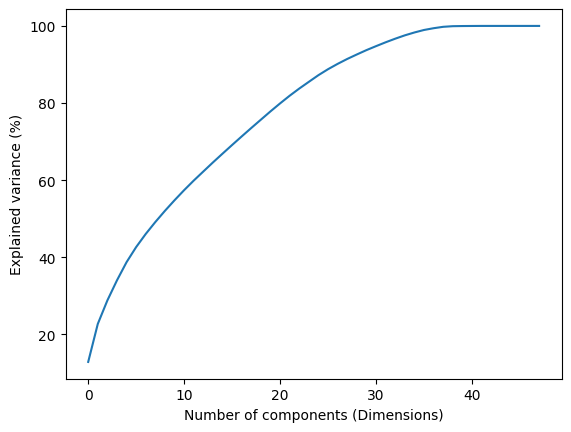

In [25]:
%matplotlib inline

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.show()

In [26]:
explained_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
a = np.arange(len(explained_var))
pc = pd.DataFrame()
pc['Number of PCs'] = a
pc['explained_var'] = explained_var
pc
#We decided to use 26 components at 90% variance. 

,Number of PCs,explained_var
0,0,12.88
1,1,22.73
2,2,28.83
3,3,34.04
4,4,38.76
5,5,42.67
6,6,46.07
7,7,49.16
8,8,52.06
9,9,54.80


In [27]:
new_pca = PCA(n_components = 26)
pca_array = pca.fit_transform(x)
pca_df = pd.DataFrame(pca_array)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.501153,2.822733,1.128722,0.467188,-3.254702,-2.202332,0.445462,-3.122818,0.353609,-0.062891,...,-0.036847,-0.075062,-0.459934,0.012919,0.002585,8.071932e-15,-2.611767e-15,5.955549e-16,-2.910944e-15,-4.046777e-15
1,-1.286199,-0.183153,0.569797,-0.662141,-0.989425,-1.317445,0.220312,-2.057712,0.459580,0.430575,...,0.074783,0.090196,0.046667,-0.024581,-0.000396,-5.900189e-15,3.601944e-15,-4.313320e-16,-2.159314e-15,2.471446e-15
2,-0.814442,-0.224448,0.124296,-0.455881,-0.851474,-0.962324,-0.021282,-2.249172,0.482969,0.379318,...,0.057843,0.061346,0.058042,-0.007246,0.000391,4.442403e-15,-8.180157e-15,2.521173e-16,2.125669e-15,-9.546812e-16
3,-1.078858,0.137336,0.477748,-0.795004,-1.361331,-1.139140,0.214827,-2.533114,0.202971,0.389876,...,0.074976,0.077435,0.052006,-0.017372,-0.000240,-1.239793e-14,-2.422343e-17,2.082935e-15,-3.299549e-15,4.489848e-15
4,3.290099,1.233822,-2.836906,-0.365719,-2.347456,-0.159168,0.077635,-0.077391,-0.104949,-1.526662,...,-0.011184,-0.070898,-0.047300,0.000958,-0.000257,-8.720587e-15,-1.024479e-15,-9.530886e-16,4.052034e-15,-2.980977e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,3.661669,-2.131750,5.386790,7.996449,0.045079,-3.690211,-0.263272,2.127494,1.767278,1.951802,...,0.181735,0.297373,0.057655,0.022737,0.000060,-2.746590e-15,3.179727e-16,-1.850527e-15,8.286670e-17,2.562226e-16
4052,-0.512967,-1.655900,6.231403,1.524268,0.373992,-0.804370,-4.464882,1.066542,0.536287,-0.687097,...,-0.108957,-0.083789,0.007794,-0.008752,0.000511,2.671410e-16,7.638973e-17,7.053215e-16,8.653177e-20,-2.110698e-16
4053,0.191034,-1.799720,6.054151,1.328977,0.810549,-1.942226,-4.813995,0.992271,-0.861307,0.168194,...,0.069373,-0.031649,-0.052471,-0.013758,-0.000994,-3.311851e-16,-5.327192e-17,-2.795125e-16,-2.338759e-16,-1.914387e-16
4054,0.551230,-1.799460,6.257332,0.945884,2.001761,-3.644928,-4.387000,0.184093,-0.080267,1.565446,...,0.153093,0.145837,-0.040260,-0.012356,-0.000675,6.877083e-16,-7.328601e-17,4.590263e-16,2.106340e-16,4.406942e-16


<AxesSubplot: >

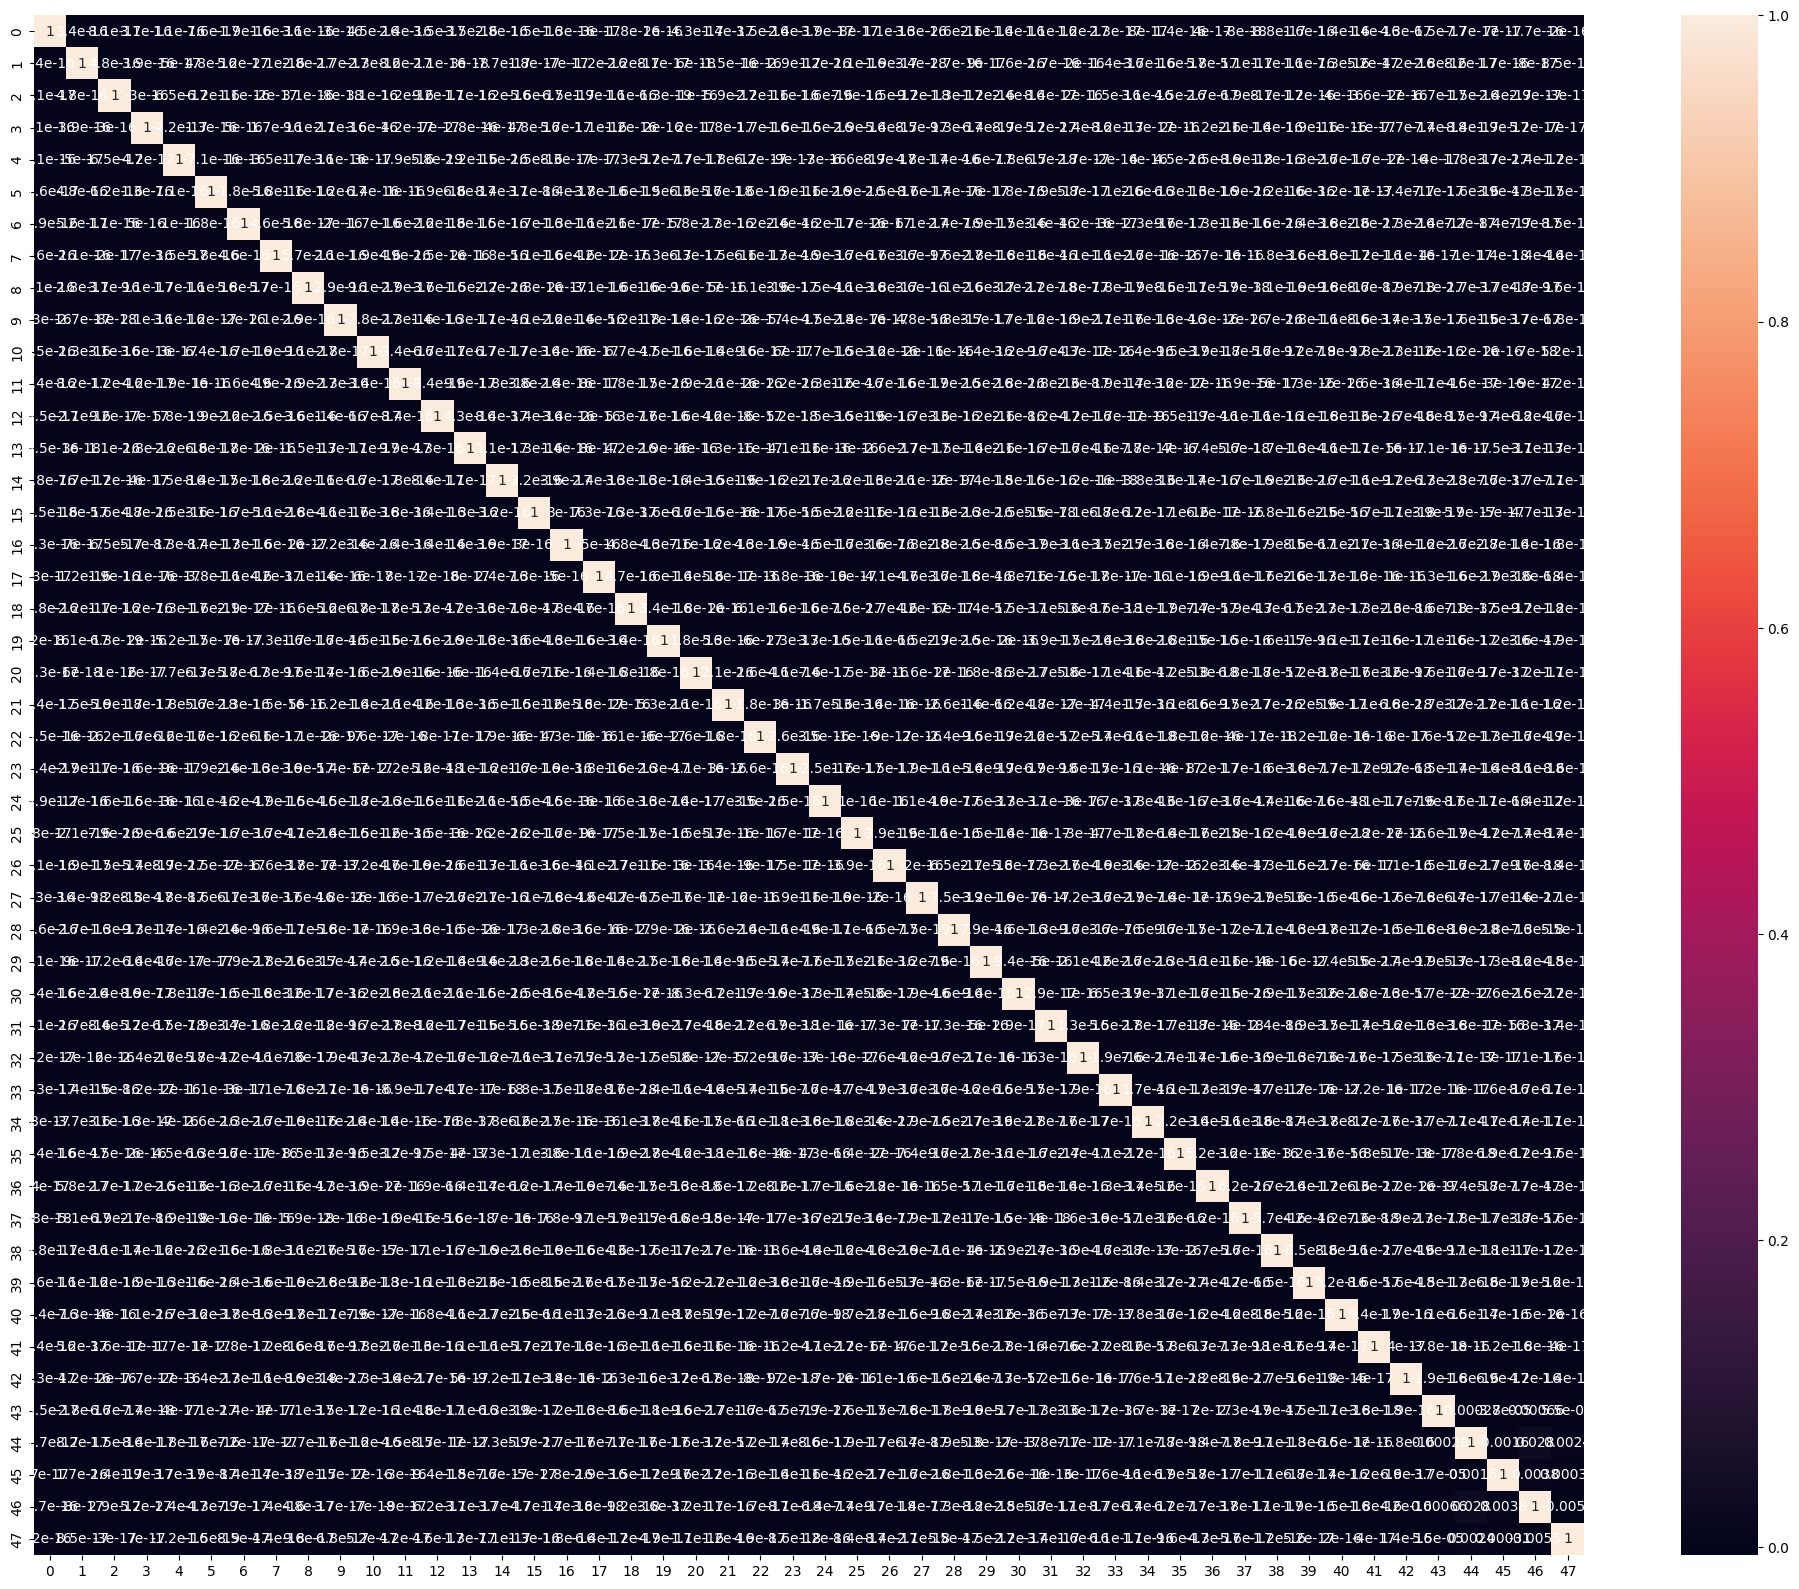

In [28]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(pca_df.corr(), annot=True)
#plt.savefig("result.png", dpi = 100)

Text(0, 0.5, 'Predicted')

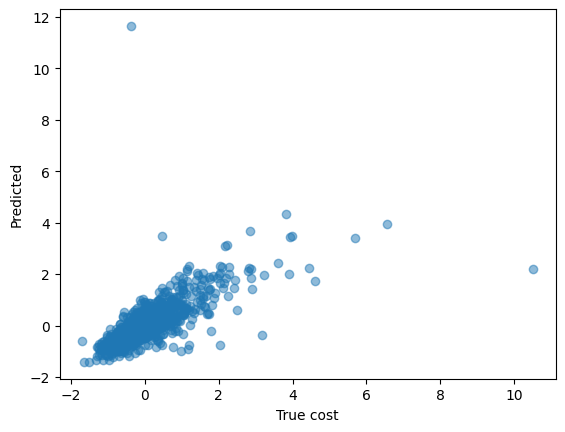

In [29]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, random_state=42)
model = lm.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True cost")
plt.ylabel("Predicted")

In [30]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the predictions from the model
        actual_y: an array of the groundtruth label
        
    Returns:
        The root mean square error between the prediction and the groundtruth
    """
    sum_sq = sum((actual_y - predicted_y) ** 2)
    return np.sqrt(np.mean(sum_sq))

In [31]:
rmse(y_test, y_pred)

21.192786316928583

In [32]:
rmse(y_train, y_train_pred)

28.832637168770432

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0924d519-5fb4-4ea7-a177-2dd063249dd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>